### Augustin Laboulet



# TP2 : Linear regression



## .....................................................................................................................




##### importing libraries used in the tp :

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model
import sklearn.metrics
import seaborn as sn
import sklearn.preprocessing
import scipy.stats

np.random.seed(0)

### Question 1 : Processing the data

standard deviation: X76    0.641619
X95    0.692919
X52    0.686342
X36    0.687264
X74    0.667049
         ...   
X35    0.659099
X87    0.656129
X89    0.669710
X96    0.645561
Y      9.197104
Length: 101, dtype: float64
mean : X76    -0.032847
X95    -0.029625
X52    -0.018319
X36     0.038119
X74     0.069168
         ...    
X35     0.017652
X87    -0.001100
X89    -0.051964
X96     0.022072
Y      22.532806
Length: 101, dtype: float64


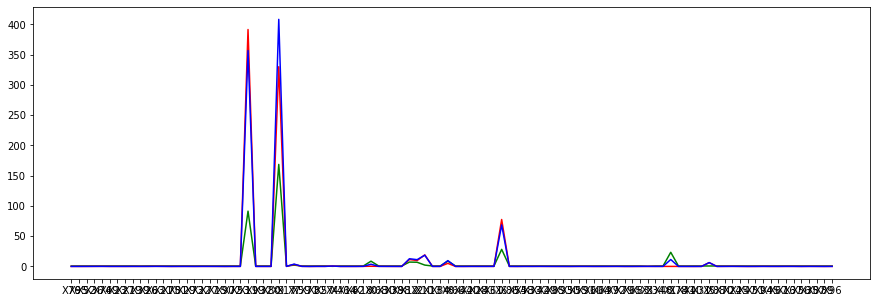

In [2]:
data = pandas.read_csv("data_tp_2.csv")  # reading data
indexs = data.columns
std = data.std(axis=0)
median = data.median(axis=0)
mean = data.mean(axis=0)
plt.figure(figsize=(15, 5))
plt.plot(indexs[:-1], std[:-1], c='green')
plt.plot(indexs[:-1], median[:-1], c='red')
plt.plot(indexs[:-1], mean[:-1], c='blue')

print("standard deviation:", std)

print("mean :", mean)

Looking at the mean (in blue) we can see that the data for most of the point the data is centered. 
The standard daviation is arround 0,65 for all, so we can conclude that the data is normalized but because the standard deviation is not 1 it is not standardized


In [3]:
# Separating the data in matrices
X = data.copy()
del X['Y']
Y = data['Y']

In [4]:
# separating data for trainning and testing
Xtrain, Xtest, Ytrain, Ytest = sklearn.model_selection.train_test_split(
    X, Y, test_size=0.25)

# centering and standardizing the data
ss = sklearn.preprocessing.StandardScaler()
X_train = pandas.DataFrame(ss.fit_transform(Xtrain), columns=Xtrain.columns)
X_test = pandas.DataFrame(ss.fit_transform(Xtest), columns=Xtest.columns)
Y_train = (Ytrain - Ytrain.mean())
Y_test = (Ytest - Ytest.mean())

Text(0.5, 1.0, 'std and mean of the train data')

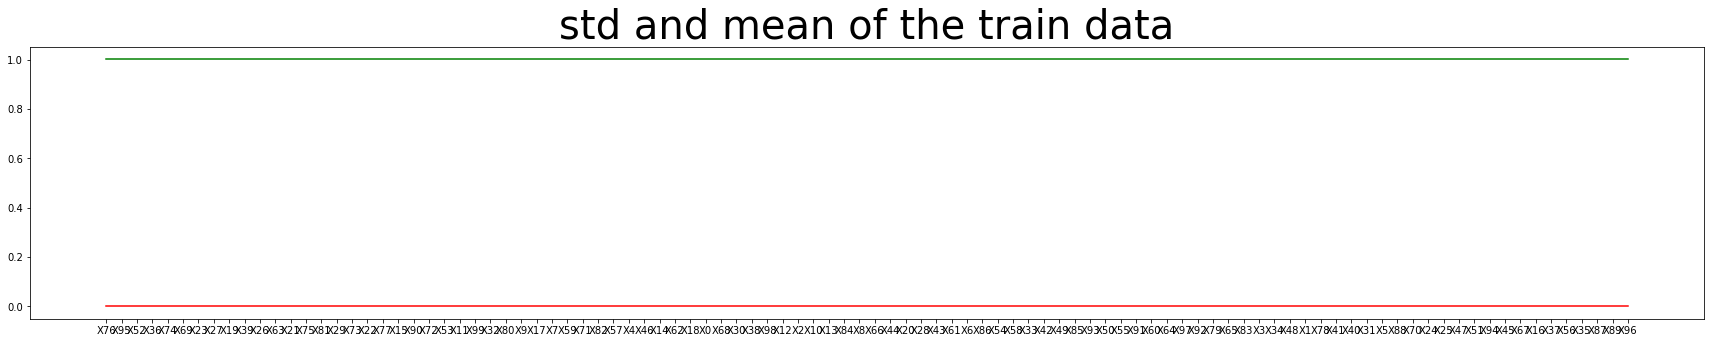

In [5]:
plt.figure(figsize=(30, 5))
plt.plot(X_train.std(), c='green')
plt.plot(X_train.mean(), c='red')
plt.title("std and mean of the train data", fontsize=40)

Text(0.5, 1.0, 'std and mean of the test data')

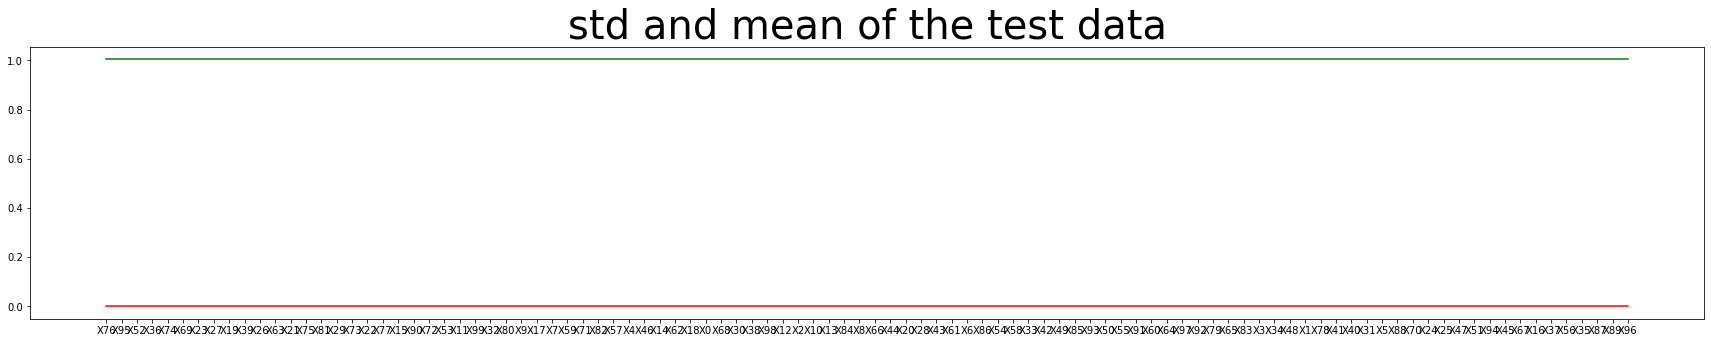

In [6]:
plt.figure(figsize=(30, 5))
plt.plot(X_test.std(), c='green')
plt.plot(X_test.mean(), c='red')
plt.title("std and mean of the test data", fontsize=40)

When the variable are scaled there won't be any huge value that can compromise some results and so we don't need to use Lasso to penalise big values. 

In [7]:
# creating empty dataframes
df_test = pandas.DataFrame()
df_coef = pandas.DataFrame()

### Question 2 :  Determination coefficient and mean squared error

In [8]:
def R_coef(theta, data, Y):  # computing determination coef
    Y_h = data@theta
    mean = Y.mean()
    return (np.linalg.norm(Y_h-mean)**2)/np.linalg.norm((Y-mean))**2


def MSE(theta, data, Y):  # computing mean squared error
    Y_h = np.array(data)@theta
    return ((np.linalg.norm(Y_h - Y))**2)/len(Y)

### Question 3 : Linear regression using sklearn 

In [9]:
# regression
reg_lin = sklearn.linear_model.LinearRegression().fit(X_train, Y_train)
print("Determination coefficient : ", R_coef(reg_lin.coef_, X_train, Y_train))
print("MSE of the test data : ", MSE(reg_lin.coef_, X_test, Y_test))

# adding the results to the dataframes
df_test["OLS"] = reg_lin.predict(X_test)
df_coef["OLS"] = reg_lin.coef_

Determination coefficient :  0.8298513403333561
MSE of the test data :  37.6138503136818


### Question 4 : Heatmap of the covariance matrix

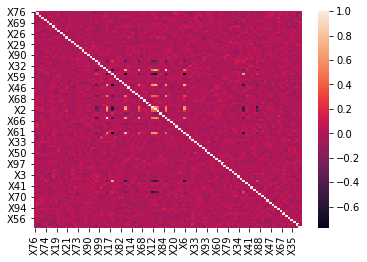

In [10]:
sn.heatmap(X_train.cov())

We see that the vectors are almost all not correlated

In [11]:
#Singular value decomposition
U,s,V = np.linalg.svd(X_train.cov(), full_matrices=True)

### Question 5 : Ploting first 2 PC of the train data

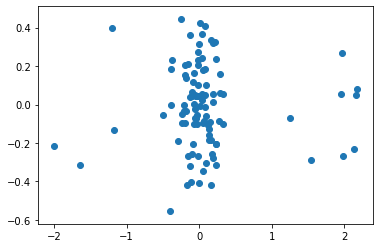

In [12]:
PCs = U*s
PC1 = PCs[:,0]
PC2 = PCs[:,1]
plt.scatter(PC1, PC2)

### Question 6 : PCA before OLS

In [13]:
#computing projected data for the train and the test
P_train = U[:,:2]@U[:,:2].T
proj_train = X_train@P_train
proj_train.columns = X_train.columns

U_test,s_test,V_test = np.linalg.svd(X_test.cov())
P_test = U_test[:,:2]@U_test[:,:2].T
proj_test = X_test@P_test
proj_test.columns = X_test.columns

#regression
reg_PCA = sklearn.linear_model.LinearRegression().fit(proj_train, Y_train)
print("Determination coefficient : " ,R_coef(reg_PCA.coef_, proj_train, Y_train))
print("MSE : ", MSE(reg_PCA.coef_, proj_test, Y_test))

#adding the results to the dataframes 
df_test['PCA'] = reg_PCA.predict(X_test)
df_coef['PCA'] = reg_PCA.coef_

Determination coefficient :  0.4325959658594765
MSE :  66.41650788913307


### Question 7 : Computing loadings of the first 2 PC

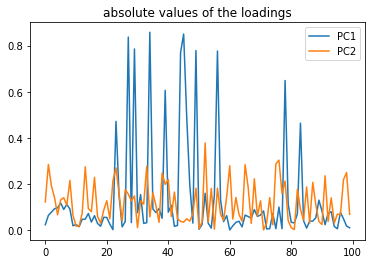

In [14]:
#computing phi
phi = (U@np.sqrt(np.diag(s)))[:,:2]
plt.plot(np.abs(phi[:,0]), label = 'PC1')
plt.plot(np.abs(phi[:,1]), label = 'PC2')
plt.title('absolute values of the loadings')
plt.legend()

### Question 8 : Lasso model with sklearn 

In [15]:
#applying the LassoCV from sklearn
lasso_reg = sklearn.linear_model.LassoCV(n_alphas = 30, alphas = np.logspace(-3,1,30)).fit(X_train, Y_train)
print("Determination coefficient : ", lasso_reg.score(X_train, Y_train))
print("MSE : ", sklearn.metrics.mean_squared_error(Y_test, lasso_reg.predict(X_test)))
print("Regularization parameter : ", lasso_reg.alpha_)

#adding the results to the dataframes 
df_test['lasso'] = lasso_reg.predict(X_test)
df_coef['lasso'] = lasso_reg.coef_

Determination coefficient :  0.7835614407800724
MSE :  34.50538535961336
Regularization parameter :  0.2212216291070448


### Question 9 : Ridge model with sklearn

In [16]:
#applying the LassoCV from sklearn
ridge_reg = sklearn.linear_model.RidgeCV(alphas = np.logspace(-1,2,30)).fit(X_train, Y_train)
print("Determination coefficient : ", ridge_reg.score(X_train, Y_train))
print("MSE : ", sklearn.metrics.mean_squared_error(Y_test, ridge_reg.predict(X_test)))
print("Regularization parameter : ", ridge_reg.alpha_)

#adding the results to the dataframes 
df_test['Ridge'] = ridge_reg.predict(X_test)
df_coef['Ridge'] = ridge_reg.coef_ 

Determination coefficient :  0.8152206953861049
MSE :  37.85209262985023
Regularization parameter :  48.93900918477494


### Question 10 : Forward variable selection method

In [17]:
def k_star(r,X,A): #computes k_star
    n=len(X)
    all_T = []
    T=0
    X_t = X[:,[0]]
    theta_h = sklearn.linear_model.LinearRegression().fit(X_t, r).coef_
    for k in A:
        current_X_t = X[:,[k]]
        reg = sklearn.linear_model.LinearRegression().fit(current_X_t, r)
        current_theta_h = reg.coef_
        s_h = 1/(np.sum(X[:,k]**2))
        sigma_h = 1/(n-1)* np.linalg.norm(r - reg.predict(current_X_t))**2
        T_k = np.linalg.norm(current_theta_h,ord = 1)/(np.sqrt(s_h*sigma_h))
        if np.linalg.norm(T_k)> np.linalg.norm(T):
            T = T_k
            k_s = k
            X_t = current_X_t
            theta_h = current_theta_h
        all_T.append(T_k)
    p_value = 2*(1-scipy.stats.norm.cdf(T))
    return k_s, X_t, theta_h, p_value, all_T


def FVS(X,Y): #computes the order of the variable
    L = []
    A = [i for i in range(len(X[1]))]
    p_values = []
    list_T =[]
    while A !=[]:
        k_s, current_X_t, theta_h, p_value, all_T = k_star(Y,X,A)
        del A[A.index(k_s)]
        Y = Y - current_X_t@theta_h
        L.append(k_s)
        p_values.append(p_value)
        list_T.append(all_T)
    return L, p_values, list_T

In [18]:
print("Result of forward variable selection:\n",FVS(np.array(X_train),Y_train)[0])

Result of forward variable selection:
 [44, 46, 29, 83, 62, 28, 9, 22, 33, 75, 24, 66, 15, 63, 20, 10, 76, 97, 4, 34, 56, 88, 53, 51, 25, 18, 47, 90, 58, 91, 16, 99, 5, 82, 31, 78, 17, 92, 36, 42, 38, 52, 21, 77, 73, 86, 6, 8, 40, 3, 94, 89, 61, 11, 7, 96, 95, 48, 43, 41, 49, 27, 45, 87, 54, 93, 60, 57, 67, 2, 39, 69, 19, 70, 14, 68, 59, 98, 32, 26, 81, 37, 79, 50, 0, 1, 85, 64, 12, 55, 30, 71, 74, 84, 80, 23, 35, 65, 13, 72]


### Question 11 : Forward variable selection method with stop criterion 

In [19]:
result = FVS(np.array(X_train),Y_train)

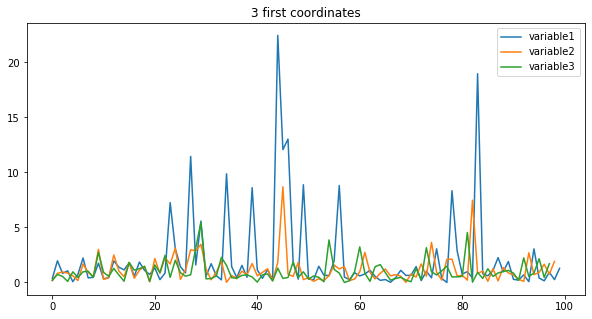

In [20]:
plt.figure(figsize=(10, 5))
for i in range(3):
    plt.plot(np.arange(len(result[2][i])), result[2][i], label = "variable" + str(i+1))
plt.title("3 first coordinates")
plt.legend()

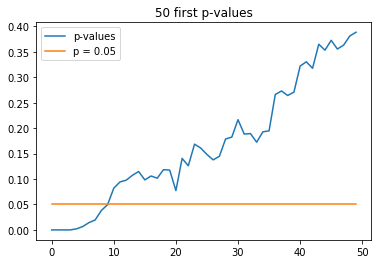

In [21]:
plt.plot(result[1][:50], label = "p-values")
plt.plot([0.05 for i in range(50)], label = "p = 0.05")
plt.legend()
plt.title("50 first p-values")
plt.show()

In [22]:
def FVS_SC(X,Y,value):
    L = []
    A = [i for i in range(len(X[1]))]
    p_value = 0
    p_values = []
    while A !=[] and p_value<value :  #new criteria for the while 
        results = k_star(Y,X,A)
        k_s = results[0]
        current_X_t = results[1]
        theta_h = results[2]
        p_value = results[3]
       # k_s, current_X_t, theta_h, p_value, all_T = k_star(Y,X,A)
        del A[A.index(k_s)]
        Y = Y - current_X_t@theta_h
        L.append(k_s)
        p_values.append(p_value)
        
    return L

In [23]:
print("Result of forward variable selection with the stopping criterion :\n", FVS_SC(np.array(X_train),Y_train, 0.05))

Result of forward variable selection with the stopping criterion :
 [44, 46, 29, 83, 62, 28, 9, 22, 33, 75, 24]


### Question 12 : OLS 

In [24]:
selected_variables = FVS_SC(np.array(X_train),Y_train, 0.05)
for i in range(len(selected_variables)) :
    selected_variables[i] = str(selected_variables[i])
    selected_variables[i] = 'X' + selected_variables[i]
    
X_train_fvs = X_train[selected_variables]
X_test_fvs = X_test[selected_variables]


#print("mse =", mse(Y_test, Y_pred_fvs))
#print("R2 =", R2(Y_test, Y_pred_fvs))
reg_fvs = sklearn.linear_model.LinearRegression().fit(X_train_fvs, Y_train)

print("Determination coefficient : ", reg_fvs.score(np.array(X_test_fvs), Y_test))
print("MSE : ", sklearn.metrics.mean_squared_error(Y_test, reg_fvs.predict(X_test_fvs)))

coef = np.zeros(100)
for i in range (len(selected_variables)-1):
    for j in range (len(indexs)):
        if indexs[j]==selected_variables[i]:
            coef[j]=reg_fvs.coef_[i]

df_test["FVS"] = reg_fvs.predict(X_test_fvs)
df_coef["FVS"] = coef

Determination coefficient :  0.0865320266831453
MSE :  74.62943405416048


### Question 13 : Summary

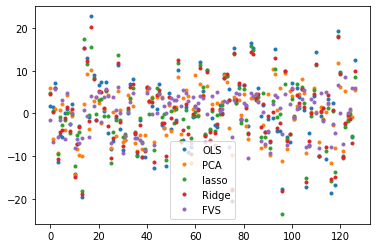

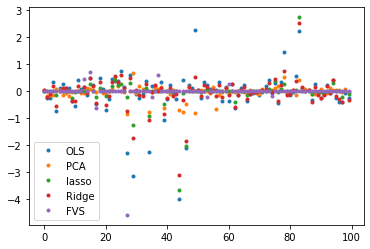

In [25]:
df_test.plot(style = '.')
df_coef.plot(style = '.')

### Question 14 

In [26]:
n_zeros = [0,0,0,0]
for i in range (len(df_coef)):
    if df_coef["OLS"][i]==0: 
        n_zeros[0]=n_zeros[0]+1
    if df_coef["Ridge"][i]==0: 
        n_zeros[1]=n_zeros[1]+1
    if df_coef["lasso"][i]==0: 
        n_zeros[2]=n_zeros[2]+1
    if df_coef["FVS"][i]==0: 
        n_zeros[3]=n_zeros[3]+1
            

print("OLS : ", n_zeros[0])
print("Ridge : ", n_zeros[1])
print("Lasso : ", n_zeros[2])
print("FVS : ", n_zeros[3])

OLS :  0
Ridge :  0
Lasso :  61
FVS :  90


The Lasso method has more zeros beacuse the penalty is more important than the penalty for Ridge. 

### Question 15 

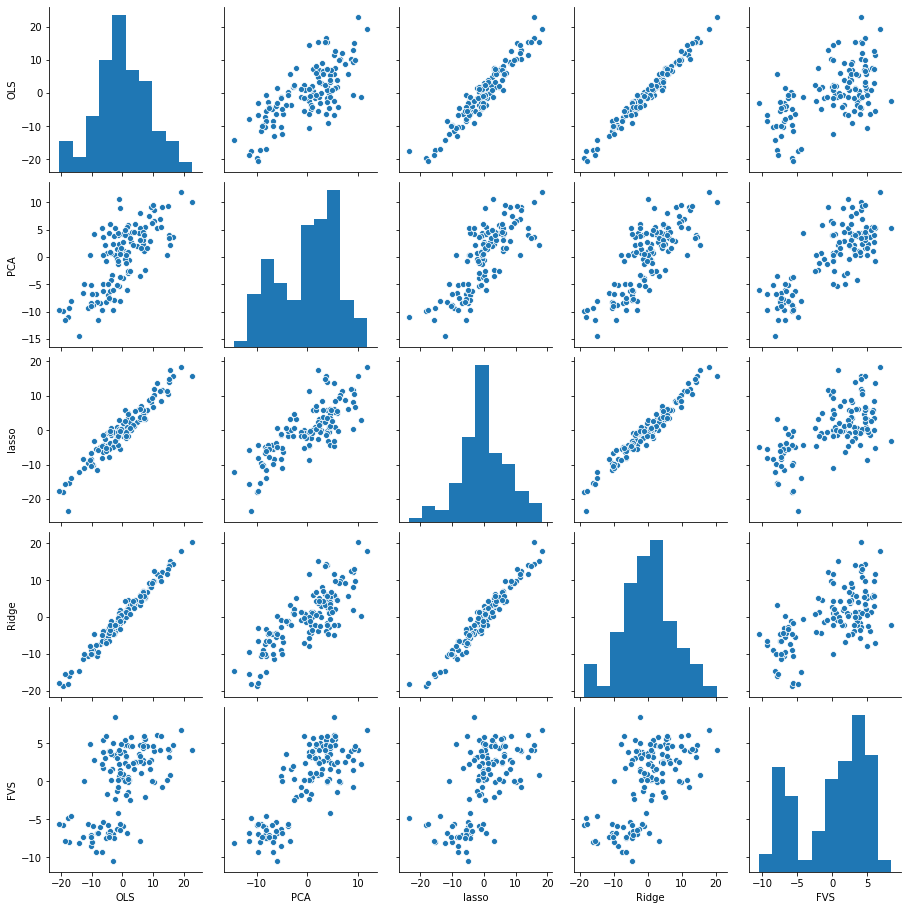

In [27]:
sn.pairplot(df_test)

To predict the value of a new unseen data point x we use the following equation : $x^T \hat{\theta}$